In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crop_recommendation.csv")

In [3]:
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<AxesSubplot:>

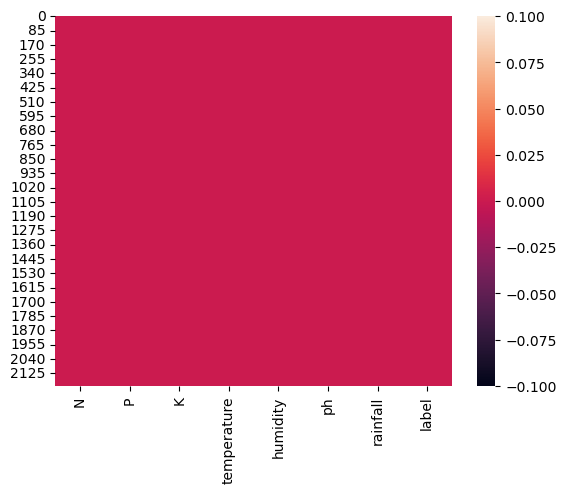

In [8]:
sns.heatmap(df.isnull())

In [9]:
#### first five rows
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [12]:
#### last five rows 
df.tail(5)

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
df.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<AxesSubplot:>

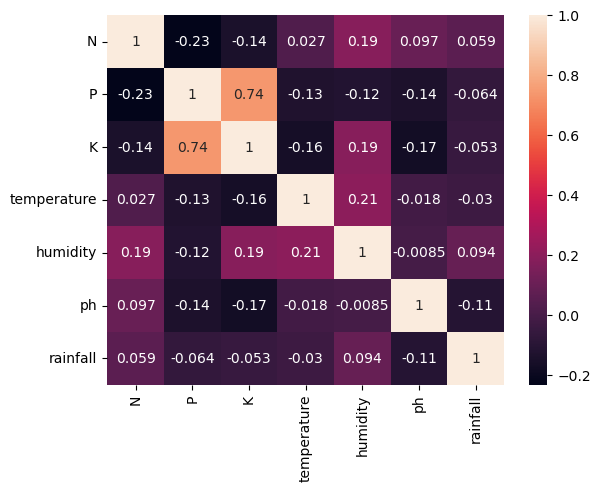

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
df.N.max()

140

In [20]:
df.N.min()

0

In [23]:
df.N.describe()

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64

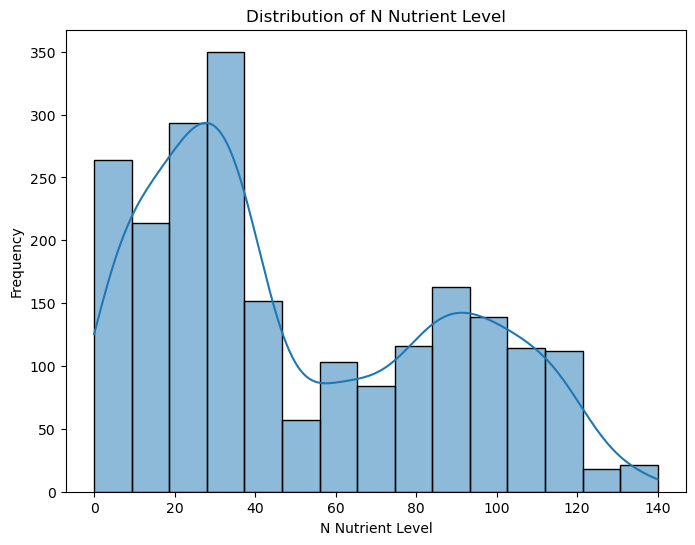

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['N'], kde=True)
plt.xlabel('N Nutrient Level')
plt.ylabel('Frequency')
plt.title('Distribution of N Nutrient Level')
plt.show()

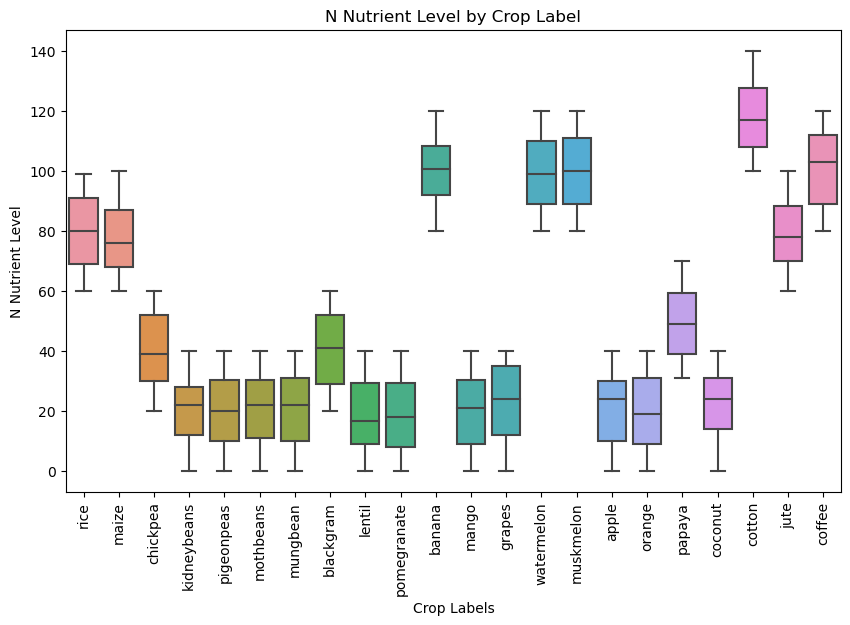

In [31]:
### Box Plot for 'N' by Crop Label:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='N', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('N Nutrient Level')
plt.title('N Nutrient Level by Crop Label')
plt.xticks(rotation=90)
plt.show()

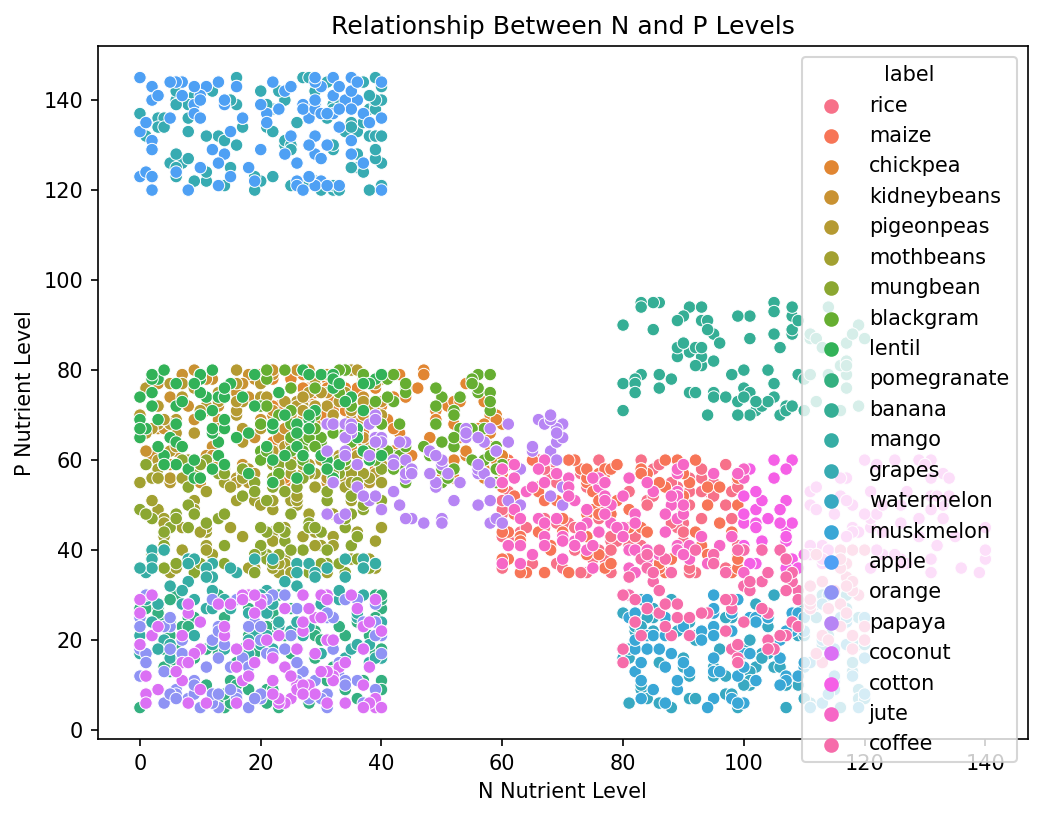

In [89]:
#### Relationship Between 'N' and 'P' Levels:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='N', y='P', hue='label', data=df)
plt.xlabel('N Nutrient Level')
plt.ylabel('P Nutrient Level')
plt.title('Relationship Between N and P Levels')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


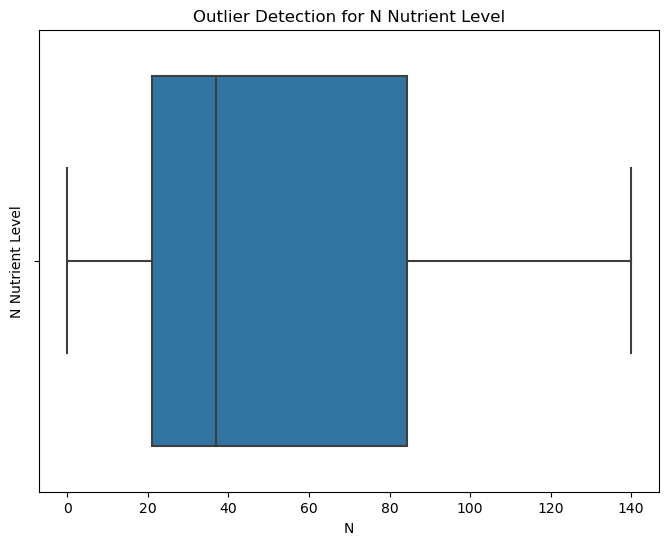

In [34]:
#### Detecting and Visualizing Outliers in 'N' Levels:
plt.figure(figsize=(8, 6))
sns.boxplot(df['N'])
plt.ylabel('N Nutrient Level')
plt.title('Outlier Detection for N Nutrient Level')
plt.show()


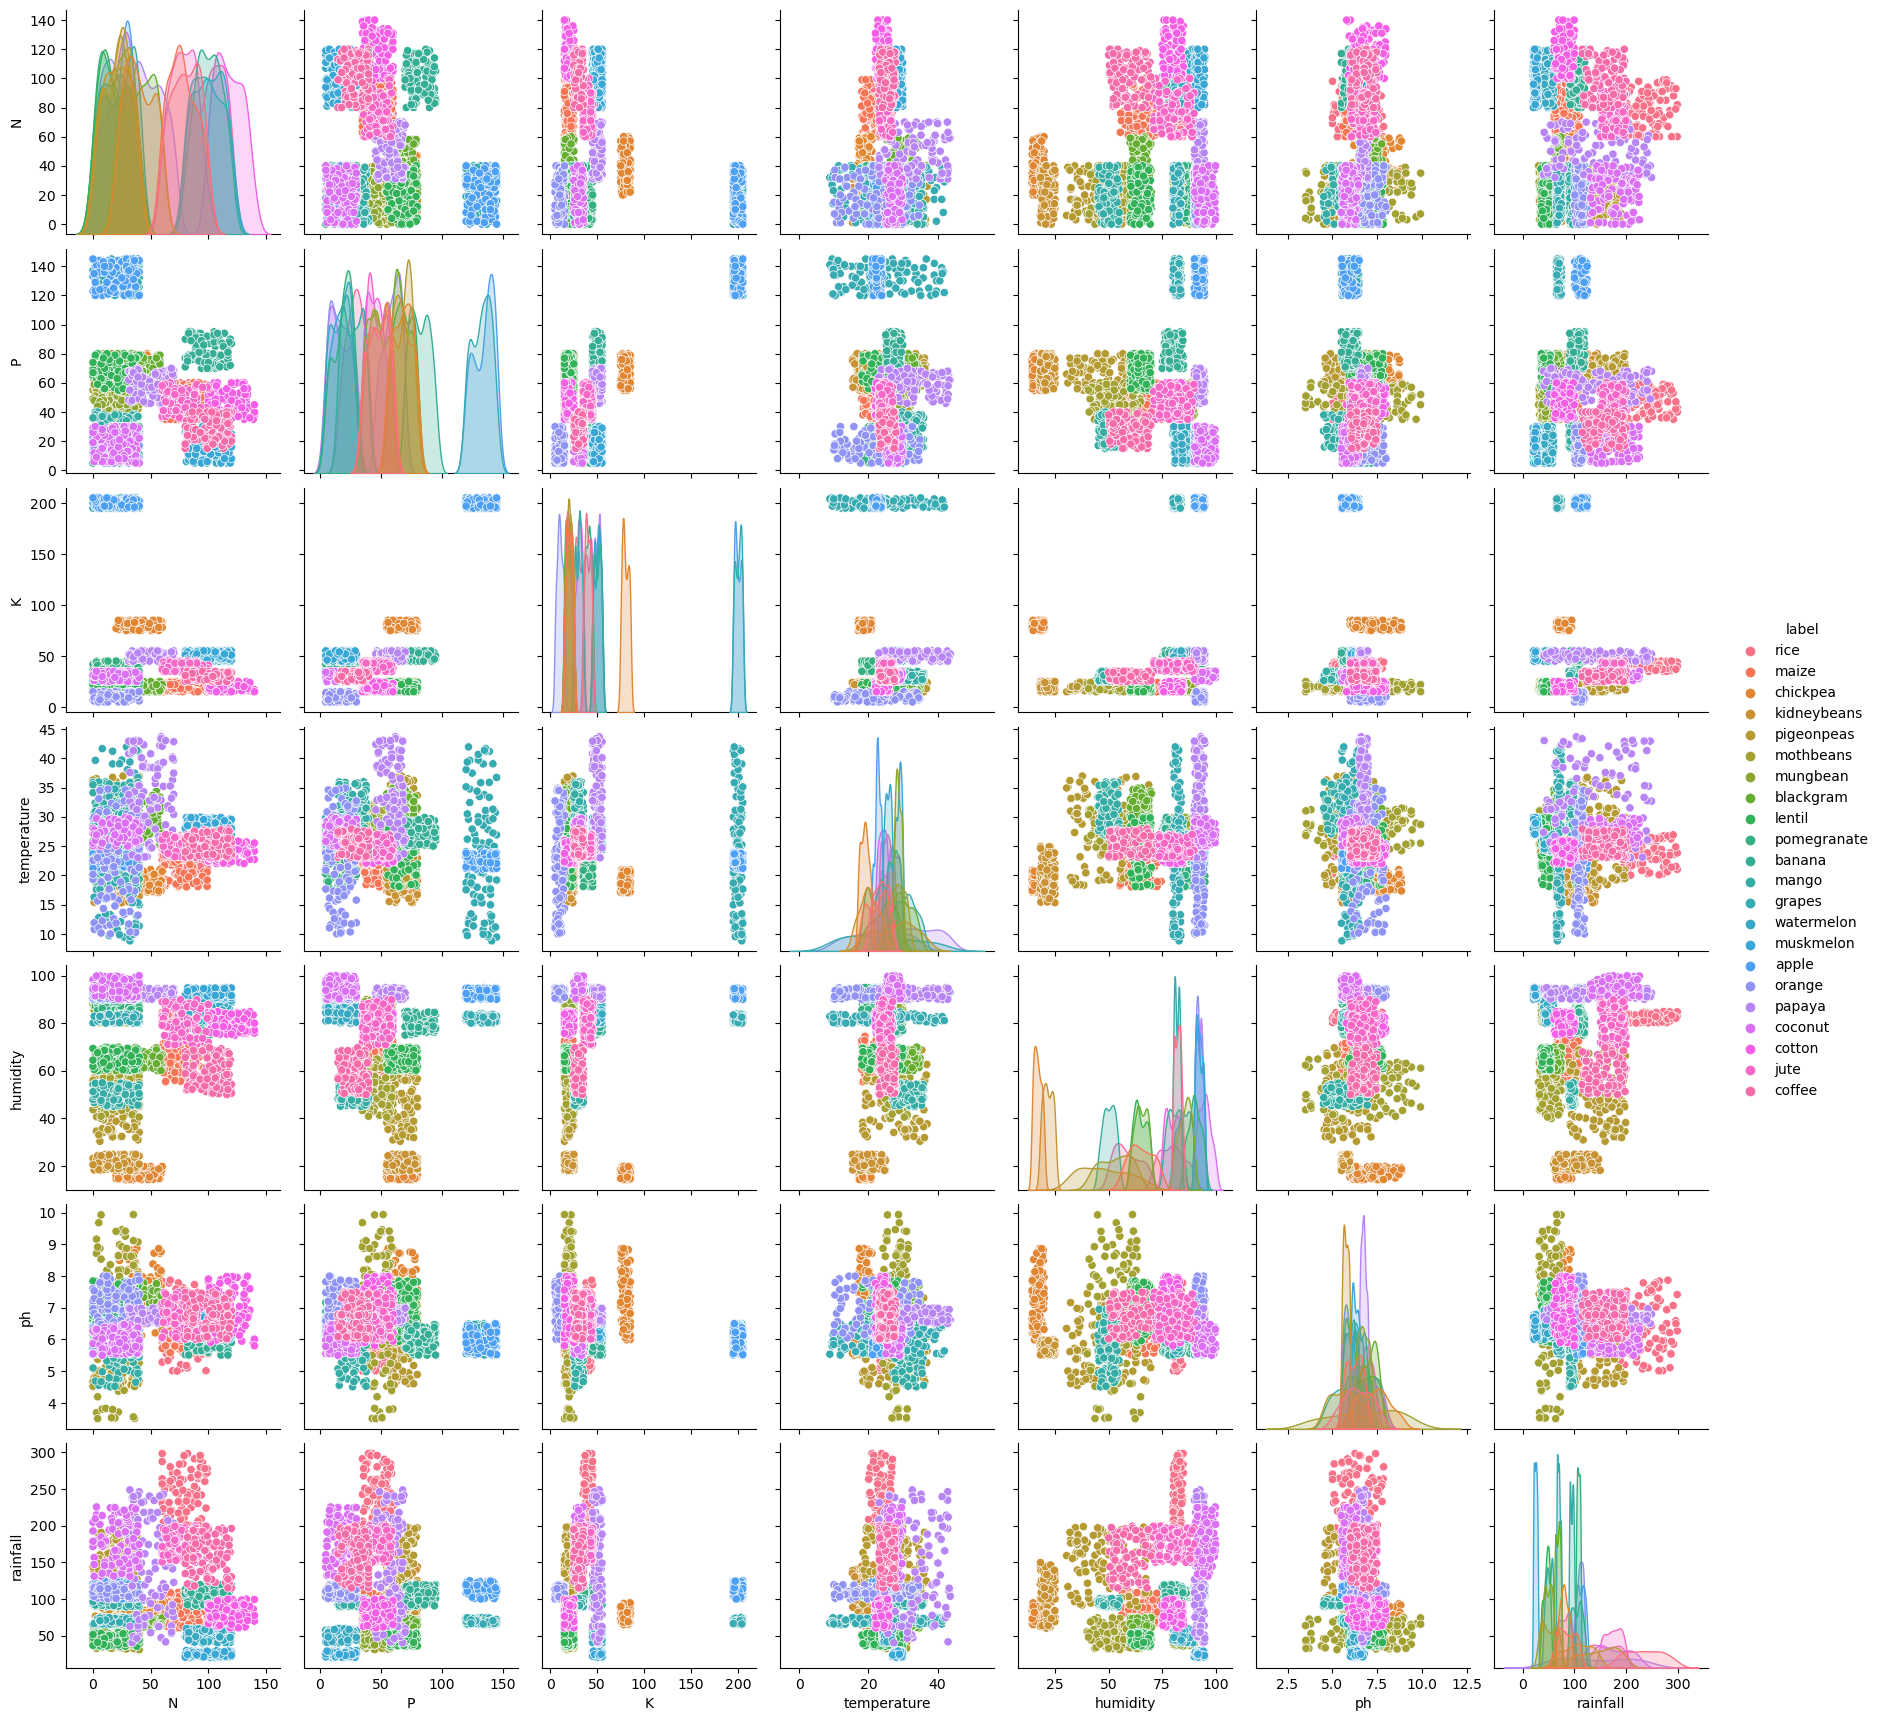

In [36]:
####Pairwise Scatter Plots for 'N' with Other Numeric Variables:
numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
sns.pairplot(data=df, vars=numeric_columns, hue='label')
plt.show()

In [39]:
df.corr().N

N              1.000000
P             -0.231460
K             -0.140512
temperature    0.026504
humidity       0.190688
ph             0.096683
rainfall       0.059020
Name: N, dtype: float64

In [41]:
df.N.value_counts()

22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: N, Length: 137, dtype: int64

In [43]:
df.P

0       42
1       58
2       55
3       35
4       42
        ..
2195    34
2196    15
2197    33
2198    32
2199    18
Name: P, Length: 2200, dtype: int64

In [44]:
df.P.head()

0    42
1    58
2    55
3    35
4    42
Name: P, dtype: int64

In [45]:
df.P.tail()

2195    34
2196    15
2197    33
2198    32
2199    18
Name: P, dtype: int64

In [46]:
df.P.min()

5

In [47]:
df.P.max()

145

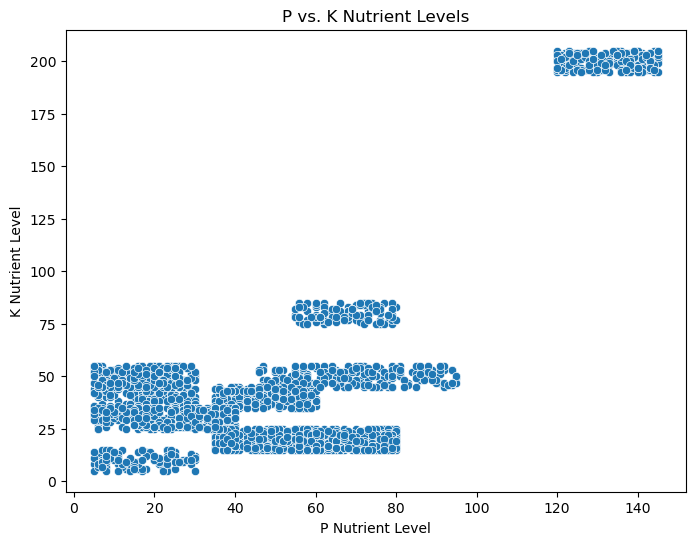

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='K', data=df)
plt.xlabel('P Nutrient Level')
plt.ylabel('K Nutrient Level')
plt.title('P vs. K Nutrient Levels')
plt.show()

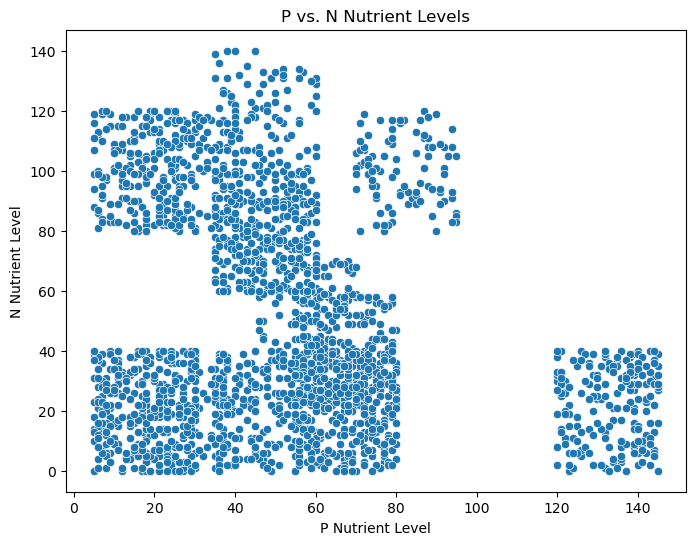

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='N', data=df)
plt.xlabel('P Nutrient Level')
plt.ylabel('N Nutrient Level')
plt.title('P vs. N Nutrient Levels')
plt.show()

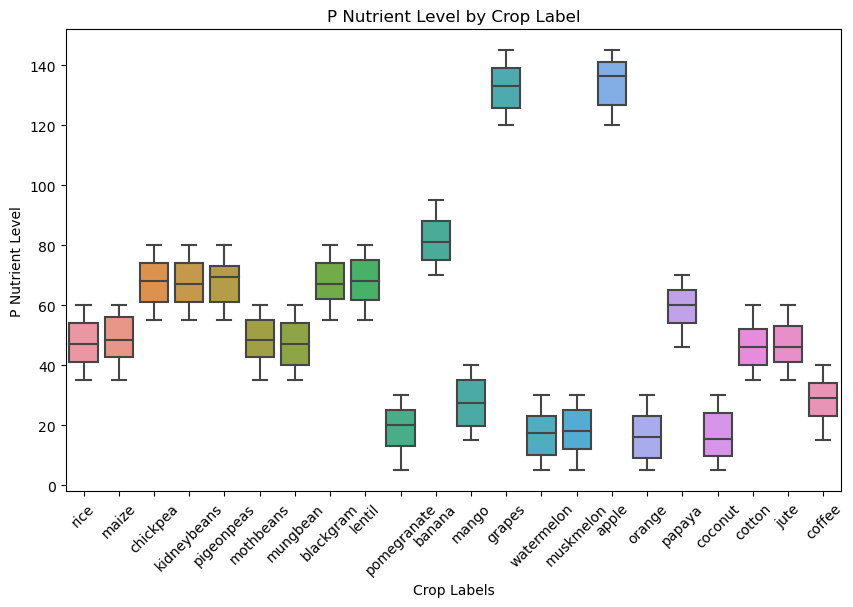

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='P', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('P Nutrient Level')
plt.title('P Nutrient Level by Crop Label')
plt.xticks(rotation=45)
plt.show()

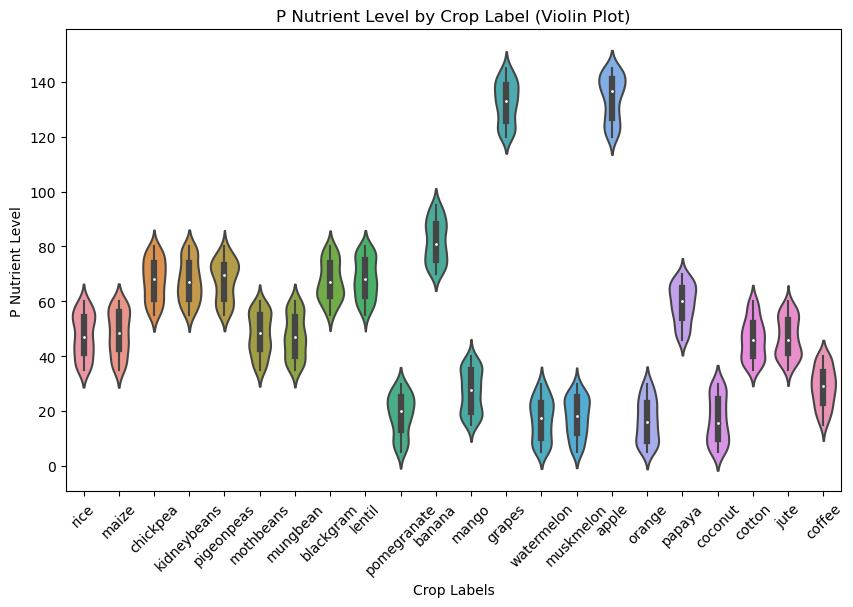

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='P', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('P Nutrient Level')
plt.title('P Nutrient Level by Crop Label (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

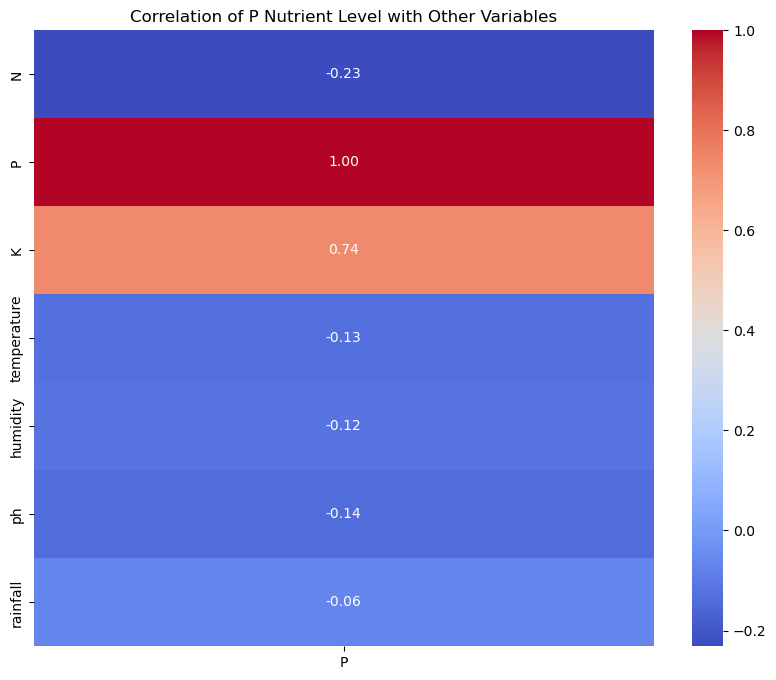

In [52]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['P']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of P Nutrient Level with Other Variables')
plt.show()

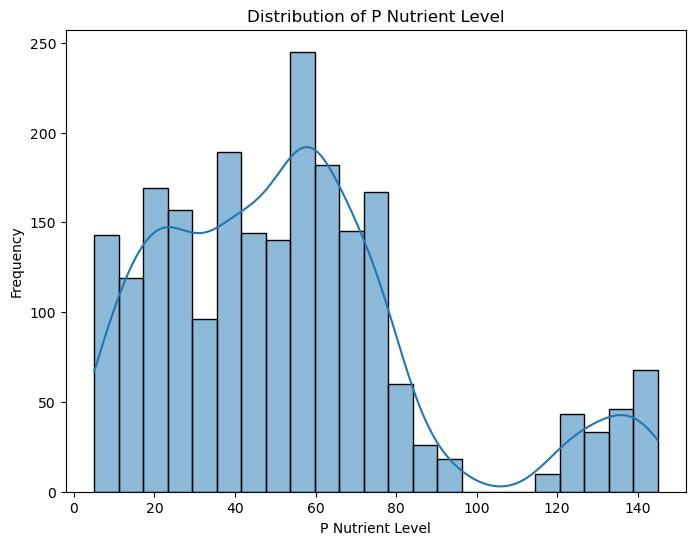

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(df['P'], kde=True)
plt.xlabel('P Nutrient Level')
plt.ylabel('Frequency')
plt.title('Distribution of P Nutrient Level')
plt.show()

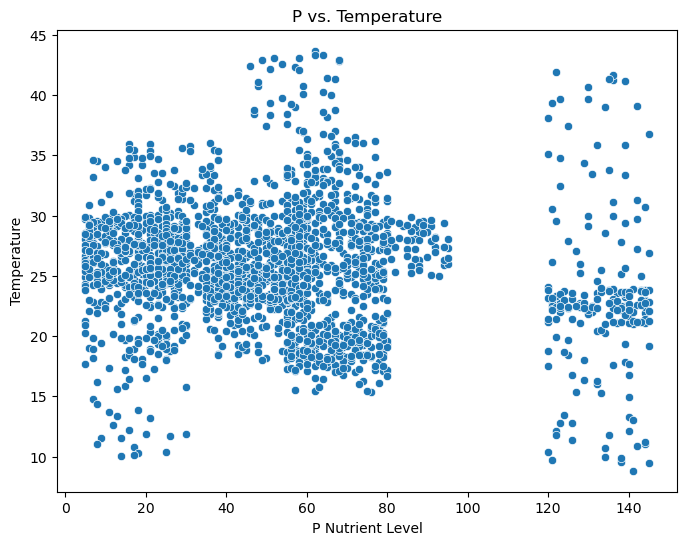

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='temperature', data=df)
plt.xlabel('P Nutrient Level')
plt.ylabel('Temperature')
plt.title('P vs. Temperature')
plt.show()

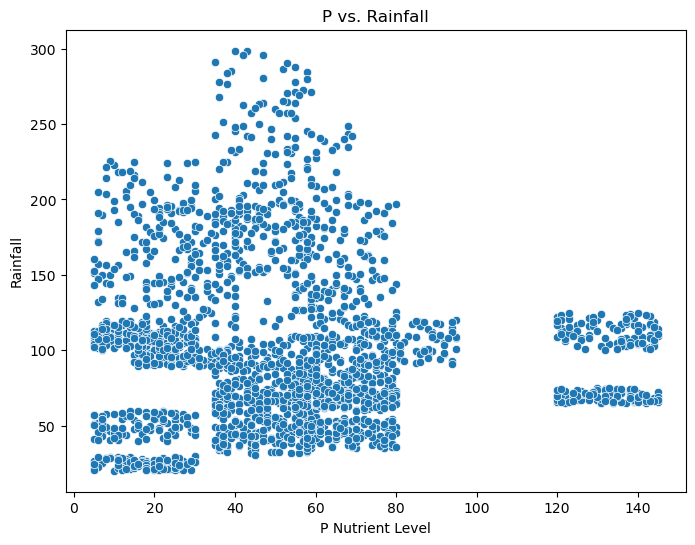

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='rainfall', data=df)
plt.xlabel('P Nutrient Level')
plt.ylabel('Rainfall')
plt.title('P vs. Rainfall')
plt.show()

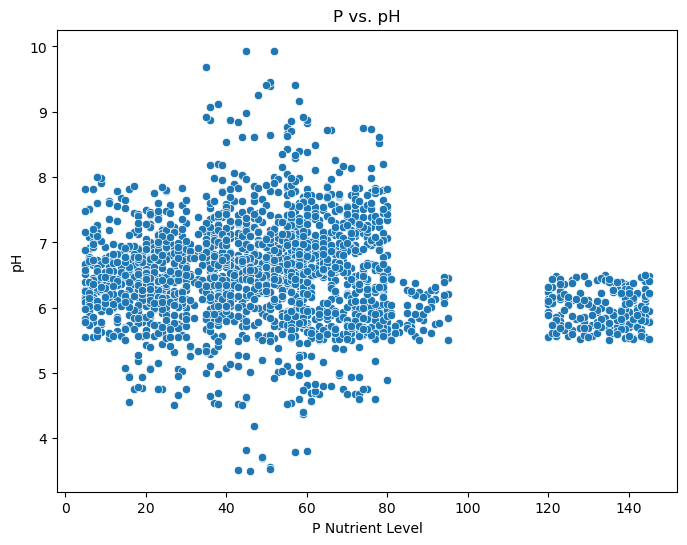

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P', y='ph', data=df)
plt.xlabel('P Nutrient Level')
plt.ylabel('pH')
plt.title('P vs. pH')
plt.show()

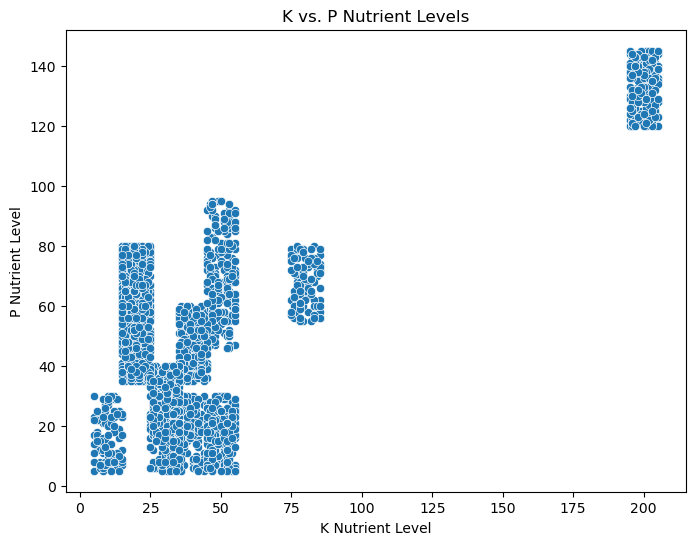

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='K', y='P', data=df)
plt.xlabel('K Nutrient Level')
plt.ylabel('P Nutrient Level')
plt.title('K vs. P Nutrient Levels')
plt.show()

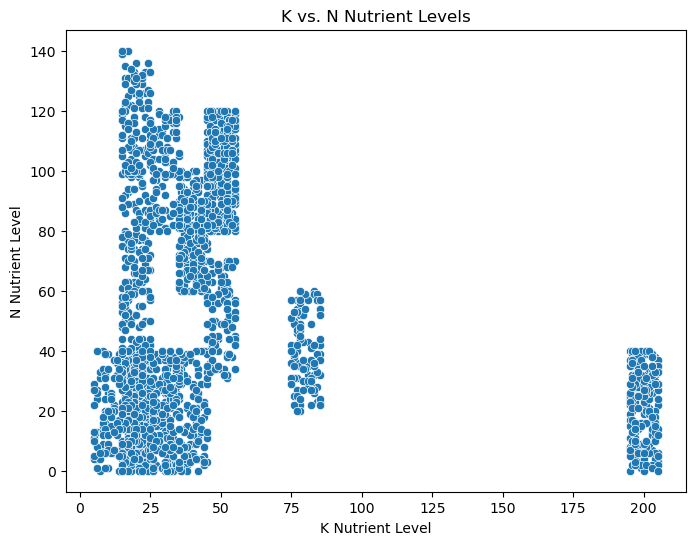

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='K', y='N', data=df)
plt.xlabel('K Nutrient Level')
plt.ylabel ('N Nutrient Level')
plt.title('K vs. N Nutrient Levels')
plt.show()


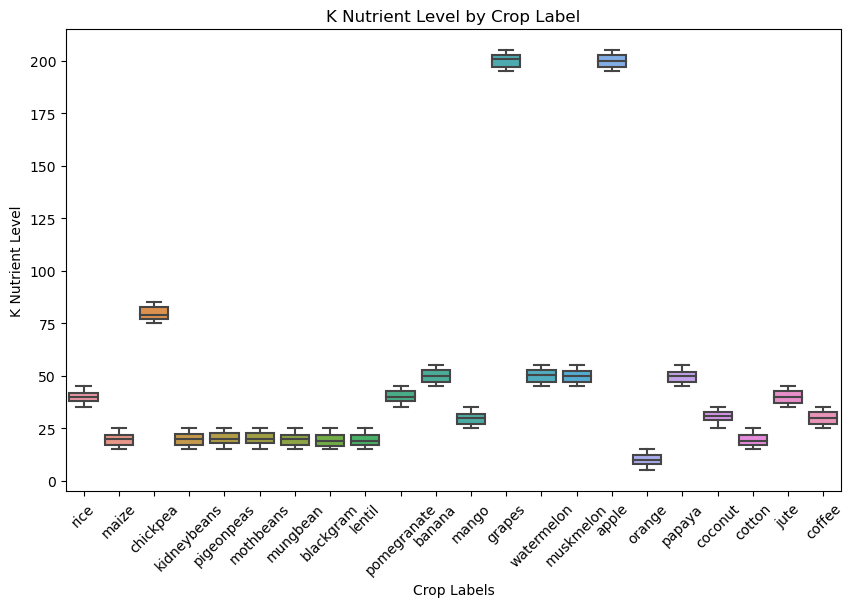

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='K', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('K Nutrient Level')
plt.title('K Nutrient Level by Crop Label')
plt.xticks(rotation=45)
plt.show()

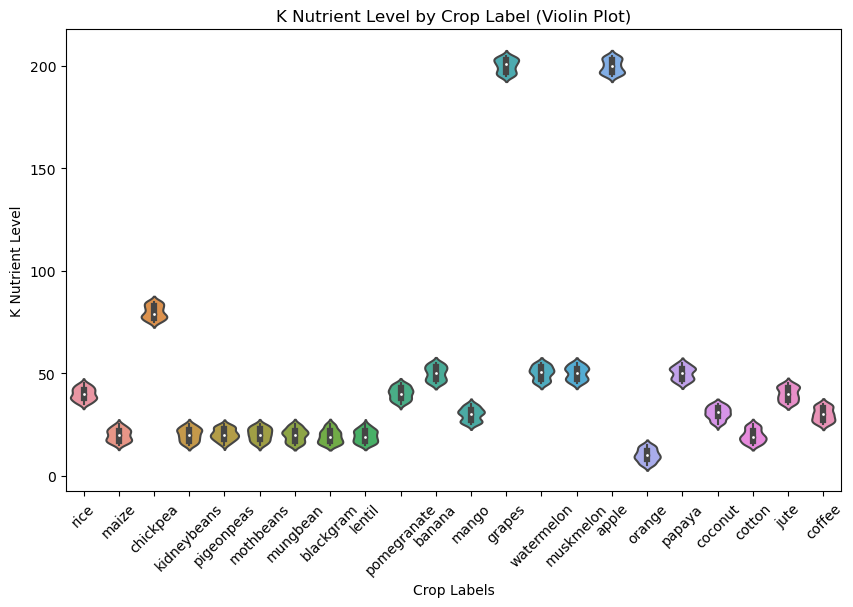

In [66]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='K', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('K Nutrient Level')
plt.title('K Nutrient Level by Crop Label (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

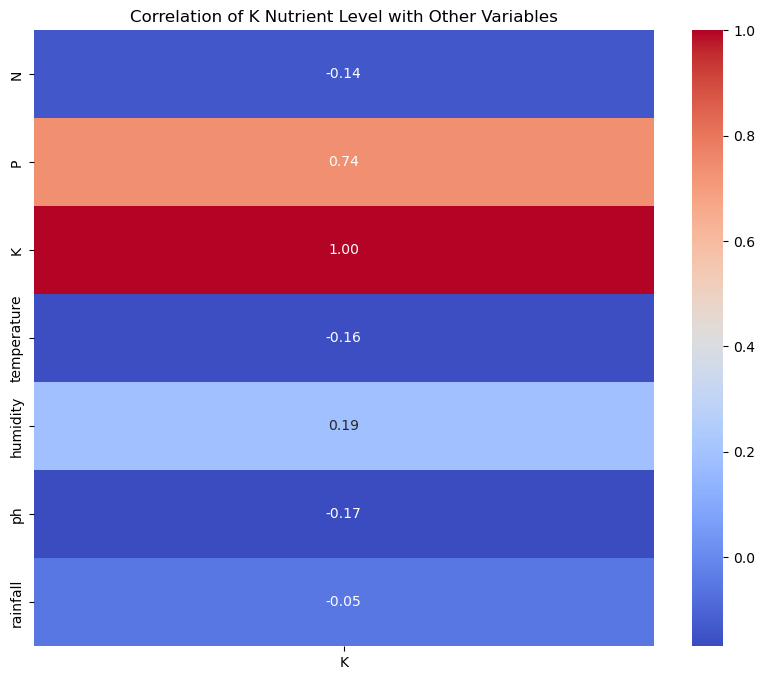

In [67]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['K']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of K Nutrient Level with Other Variables')
plt.show()

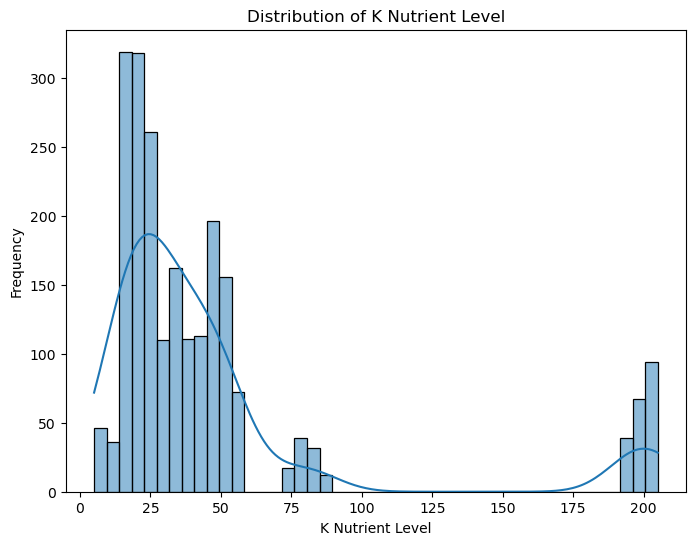

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(df['K'], kde=True)
plt.xlabel('K Nutrient Level')
plt.ylabel('Frequency')
plt.title('Distribution of K Nutrient Level')
plt.show()

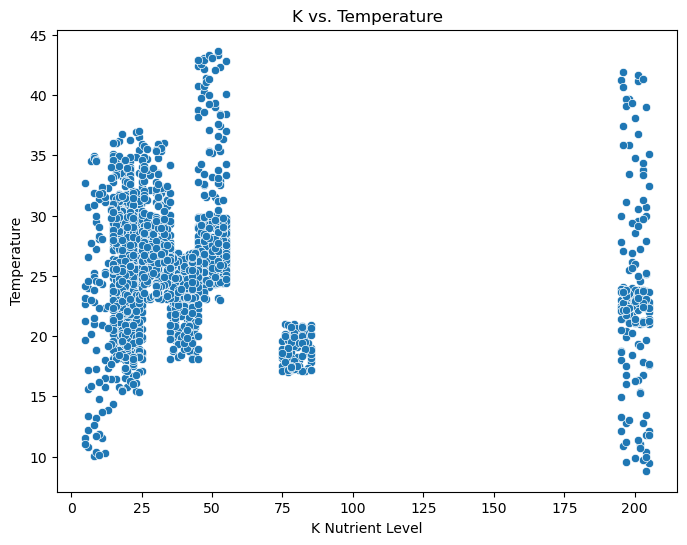

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='K', y='temperature', data=df)
plt.xlabel('K Nutrient Level')
plt.ylabel('Temperature')
plt.title('K vs. Temperature')
plt.show()

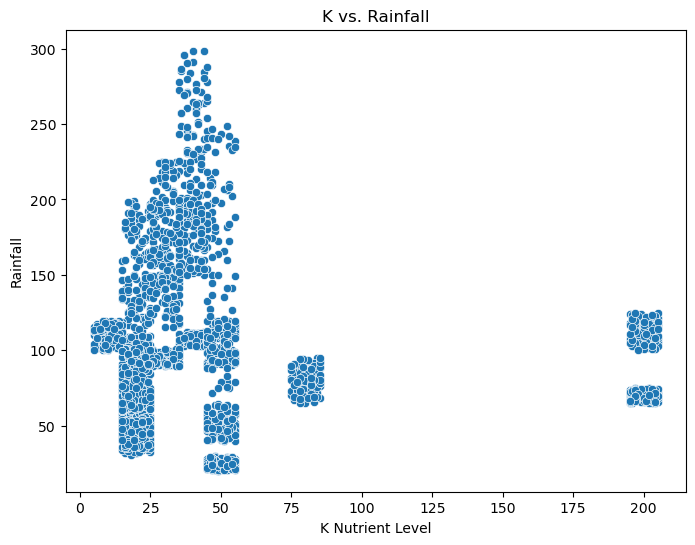

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='K', y='rainfall', data=df)
plt.xlabel('K Nutrient Level')
plt.ylabel('Rainfall')
plt.title('K vs. Rainfall')
plt.show()

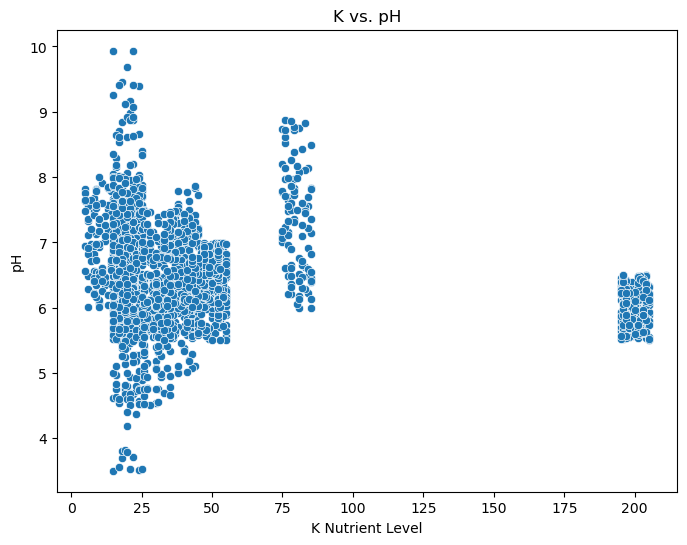

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='K', y='ph', data=df)
plt.xlabel('K Nutrient Level')
plt.ylabel('pH')
plt.title('K vs. pH')
plt.show()

In [72]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [73]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

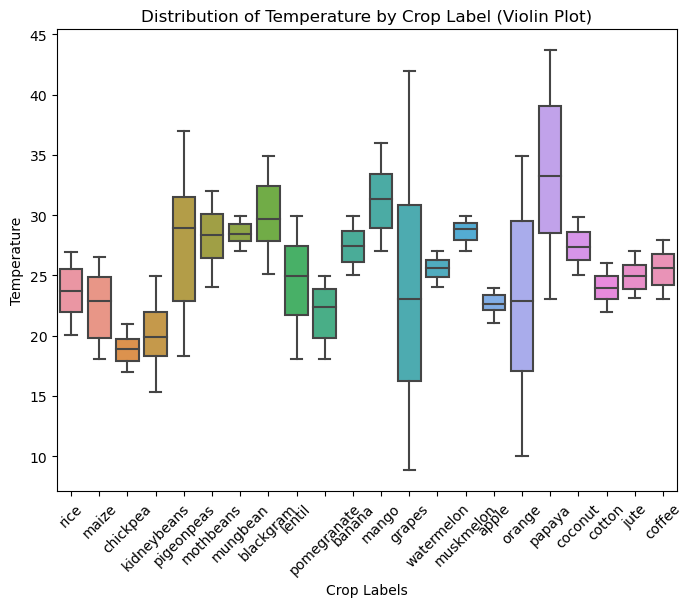

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='temperature', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('Temperature')
plt.title('Distribution of Temperature by Crop Label (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

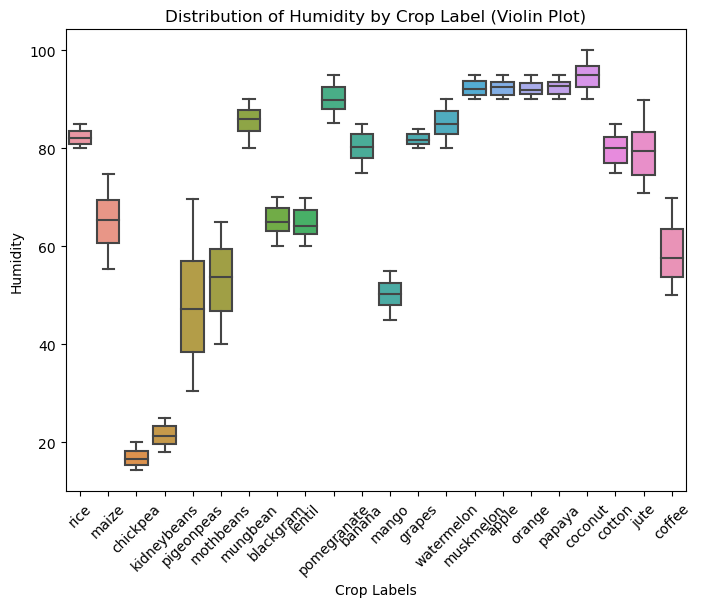

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='humidity', data=df)
plt.xlabel('Crop Labels')
plt.ylabel('Humidity')
plt.title('Distribution of Humidity by Crop Label (Violin Plot)')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

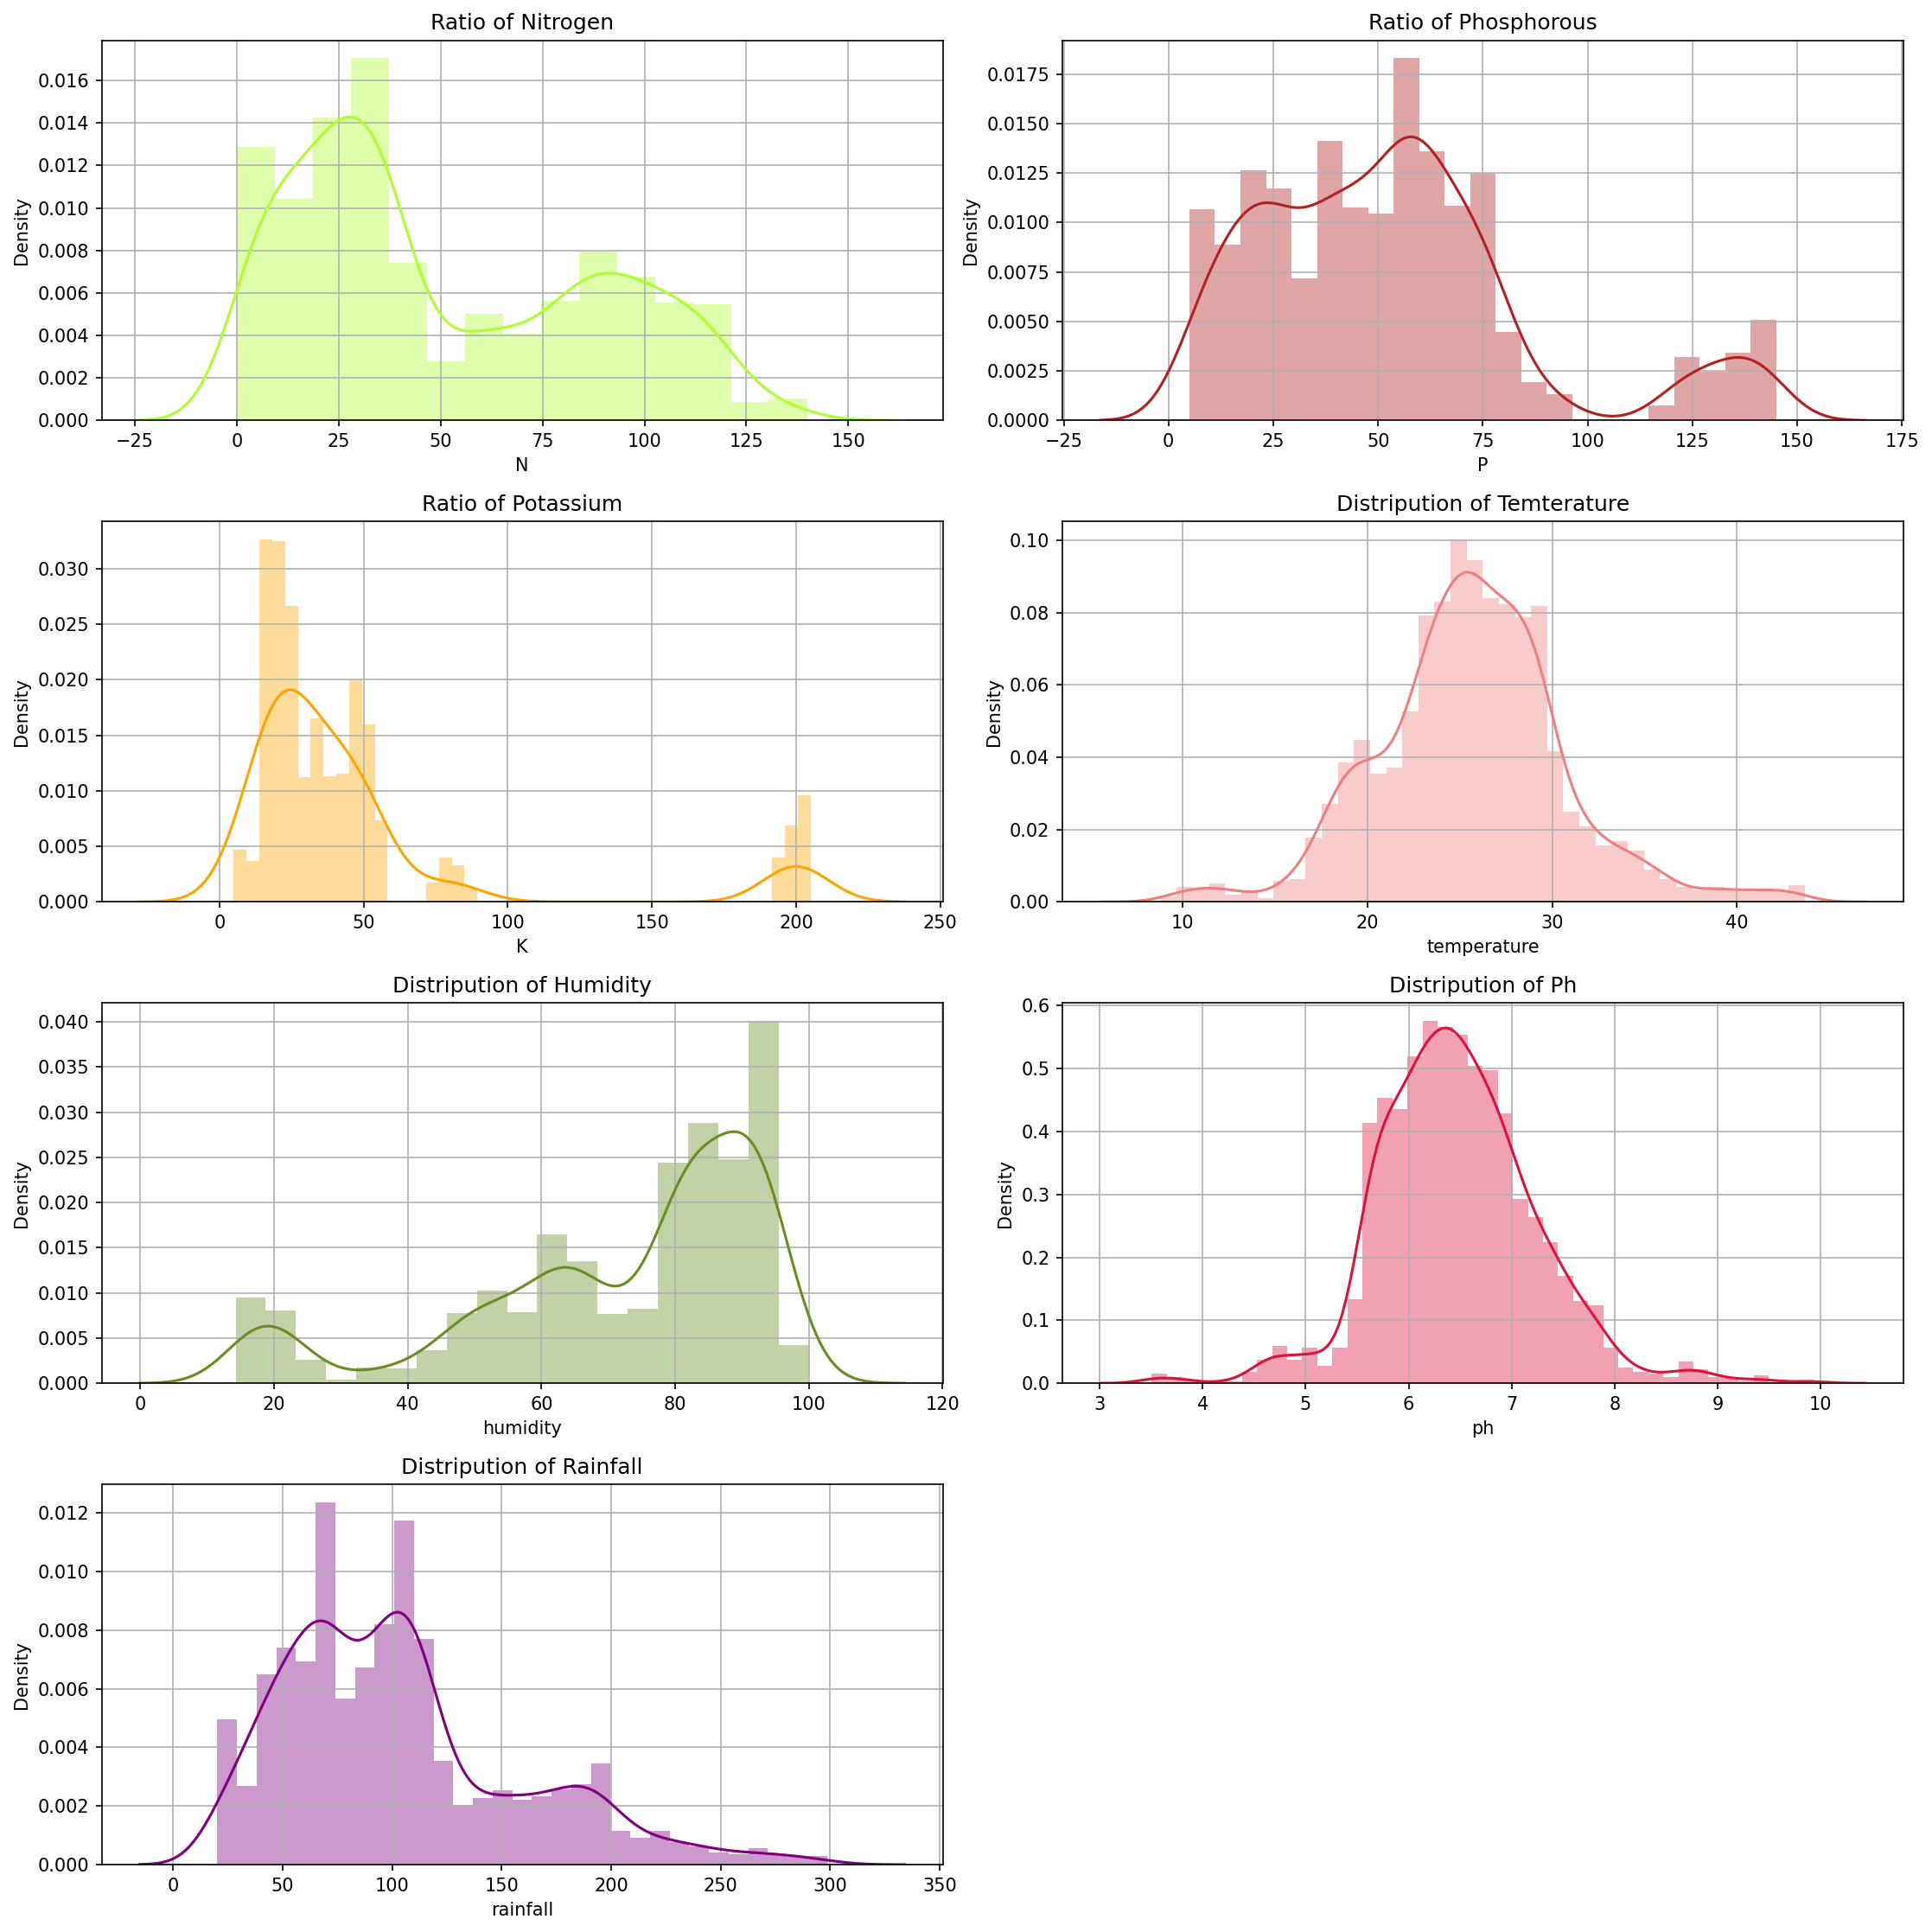

In [79]:
## over all distribution

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.distplot(df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(df['temperature'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(df['humidity'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(df['rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

In [80]:

print("Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? \n\nData: The answer is : {}" .format(df[df['N'] > 120]['label'].unique()))
print("\n\nQuestion.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? \n\nData: The answer is : {}" .format(df[df['P'] > 100]['label'].unique()))
print("\n\nQuestion.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? \n\nData: The answer is : {}" .format(df[df['K'] > 200]['label'].unique()))
print("\n\nQuestion.No 4. Crops which requires very High Rainfall ? \n\nData: The answer is : {}" .format(df[df['rainfall'] > 200]['label'].unique()))
print("\n\nQuestion.No 5. Crops which requires very Low Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] < 10]['label'].unique()))
print("\n\nQuestion.No 6. Crops which requires very High Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] > 40]['label'].unique()))
print("\n\nQuestion.No 7. Crops which requires very Low Humidity ? \n\nData: The answer is : {}" .format(df[df['humidity'] < 20]['label'].unique()))
print("\n\nQuestion.No 8. Crops which requires very Low pH ? \n\nData: The answer is : {}" .format(df[df['ph'] < 4]['label'].unique()))
print("\n\nQuestion.No 9. Crops which requires very High pH ? \n\nData: The answer is : {}" .format(df[df['ph'] > 9]['label'].unique()))

Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? 

Data: The answer is : ['cotton']


Question.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 4. Crops which requires very High Rainfall ? 

Data: The answer is : ['rice' 'papaya' 'coconut']


Question.No 5. Crops which requires very Low Temperature ? 

Data: The answer is : ['grapes']


Question.No 6. Crops which requires very High Temperature ? 

Data: The answer is : ['grapes' 'papaya']


Question.No 7. Crops which requires very Low Humidity ? 

Data: The answer is : ['chickpea' 'kidneybeans']


Question.No 8. Crops which requires very Low pH ? 

Data: The answer is : ['mothbeans']


Question.No 9. Crops which requires very High pH ? 

Data: The answer is : ['mothbeans']


In [83]:

## pivot table based on label

df_label = pd.pivot_table(df, index=['label'], aggfunc='mean')
df_label.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892